# Read image from csv file

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import scipy.misc
import struct
import os

# Run executable in visual studio and plot image

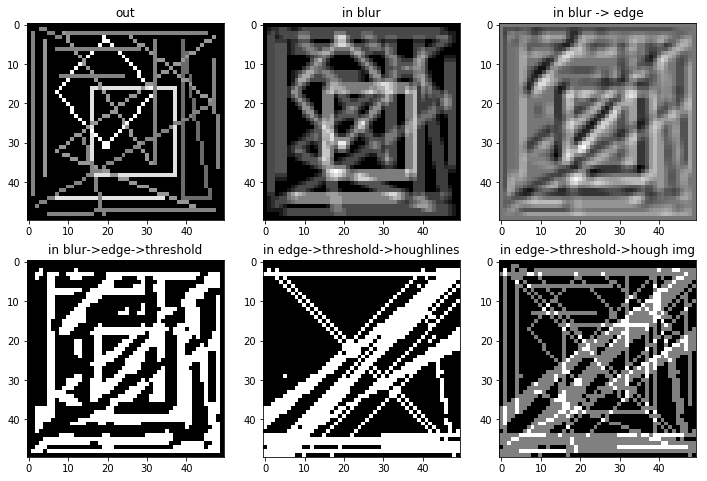

In [11]:
rows = 50
cols = 50
data_type = "int16"
baseDir = "./zybo/build/Debug/"
struct_type = "@H"

#data = np.random.rand(50,50)
#data = scipy.misc.ascent()

#data = np.ones((5,10))*np.linspace(1,10,10)
data = cv.imread("./images/mini_shapes.png", cv.IMREAD_GRAYSCALE)

data = np.array(data,dtype=data_type).reshape(-1)

with open("in_file","wb") as f:
    for d in data:
        f.write(struct.pack(struct_type,d))

plt.figure(figsize=(12,8))
ax = plt.subplot(2,3,1)
ax.set_title("out")
plt.imshow(data.reshape(rows,-1),cmap="gray")

import subprocess
programPath = os.path.join(baseDir,"main.exe")
subprocess.call([programPath])

ax = plt.subplot(2,3,2)
ax.set_title("in blur")
inp = np.fromfile("out_file_blur",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,3)
ax.set_title("in blur -> edge")
inp = np.fromfile("out_file_blur_edge",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,4)
ax.set_title("in blur->edge->threshold")
inp = np.fromfile("out_file_threshold",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,5)
ax.set_title("in edge->threshold->houghlines")
inp = np.fromfile("out_file_hough_lines",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,6)
ax.set_title("in edge->threshold->hough img")
inp = np.fromfile("out_file_hough_img",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

# plt.savefig("PC_swtest.pdf")

# Read images from SDK software 

## Mini shapes img

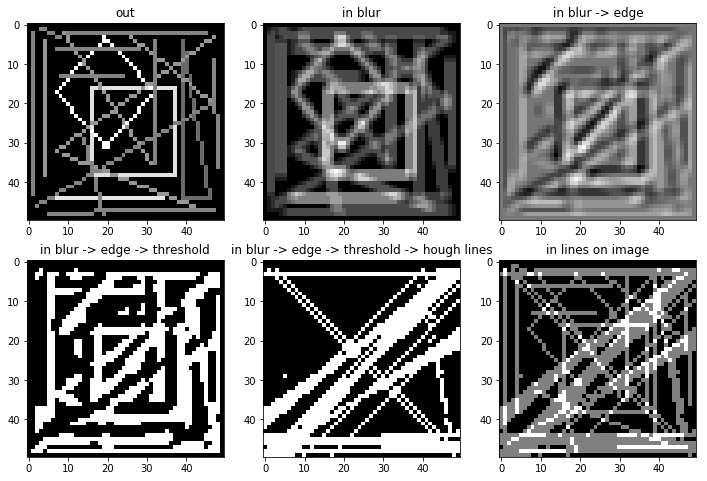

In [14]:
rows = 50
cols = 50
data_type = "int16"

plt.figure(figsize=(12,8))
ax = plt.subplot(2,3,1)
ax.set_title("out")
inp = np.fromfile("./images/input",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,2)
ax.set_title("in blur")
inp = np.fromfile("./images/FinalBoardTest/BLURM",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,3)
ax.set_title("in blur -> edge")
inp = np.fromfile("./images/FinalBoardTest/EDGEM",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,4)
ax.set_title("in blur -> edge -> threshold")
inp = np.fromfile("./images/FinalBoardTest/THRESHM",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,5)
ax.set_title("in blur -> edge -> threshold -> hough lines")
inp = np.fromfile("./images/FinalBoardTest/HOUGHM",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,6)
ax.set_title("in lines on image")
inp = np.fromfile("./images/FinalBoardTest/OUTM",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

plt.savefig("ZYBO_swtest.pdf")

# Hardware convolution zybo board

## Mini shapes image

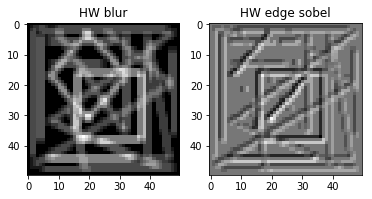

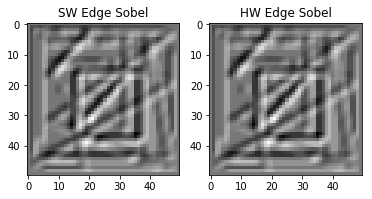

In [3]:
rows = 50
cols = 50
data_type = "int16"

ax = plt.subplot(1,2,1)
ax.set_title("HW blur")
inp = np.fromfile("./images/HWBLURM",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(1,2,2)
ax.set_title("HW edge sobel")
inp = np.fromfile("./images/HWEDGEM",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

#show hw vs software for edge
plt.figure()
ax = plt.subplot(1,2,1)
ax.set_title("SW Edge Sobel")
inp = np.fromfile("./images/SW_EDGE",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(1,2,2)
ax.set_title("HW Edge Sobel")
inp = np.fromfile("./images/HW_EDGE",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")
# plt.savefig("SW_vs_HW.pdf")

## Cameraman image

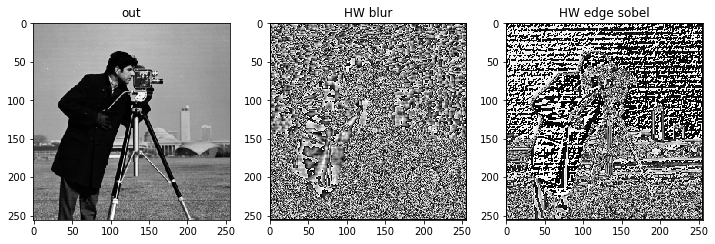

In [14]:
rows = 256
cols = 256
data_type = "uint8"

plt.figure(figsize=(12,8))
ax = plt.subplot(1,3,1)
ax.set_title("out")
inp = np.fromfile("./images/in_file",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(1,3,2)
ax.set_title("HW blur")
inp = np.fromfile("./images/HWBLURC",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(1,3,3)
ax.set_title("HW edge sobel")
inp = np.fromfile("./images/HWEDGEC",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")